<a href="https://colab.research.google.com/github/erikjskie/ensemblemerge_manuscript/blob/main/Supplementary_Fig10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(magrittr)
library(ggplot2)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()



## Supplementary Figure 10A

In [2]:
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/fig1.csv")
dat = read.table(file = "skiex003/datasets/EnsembleMerge/fig1.csv", header = T, sep = ",")
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/fastMNN.csv")
mnn = read.table(file = "skiex003/datasets/EnsembleMerge/fastMNN.csv", header = T, sep = ",")
mnn$Dataset = recode_factor(mnn$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_3 = "Chen 2020", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")
mnn = mnn[,c("score", "score_method", "method", "Dataset", "Datasets")]
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/scVI.csv")
scvi = read.table(file = "skiex003/datasets/EnsembleMerge/scVI.csv", header = T, sep = ",")
scvi$Dataset = recode_factor(scvi$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_3 = "Chen 2020", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")
scvi = scvi[,c("score", "score_method", "method", "Dataset", "Datasets")]
dat = rbind(dat, mnn)
dat = rbind(dat, scvi)
nData = dat$Datasets %>% unique() %>% length()
nMethod = dat$method %>% unique() %>% length()
range0_1 <- function(x){x/(nData*nMethod)}
Metric_Colors = c("ARI_Cell" = "#C93327", "NMI" = "#F4CDB3", "ASW_Cell" = "#F8766D", "GC" = "#857622", "ARI_Batch" = "#8A9DA4",  "ASW_Batch" = "#75A08B")
dat$method = factor(dat$method, levels = c("EnsembleMerge", "Seurat", "Harmony", "fastMNN", "Scanorama", "BBKNN", "Liger", "Uncorrected"))
dat$score_method = factor(dat$score_method, levels = c("NMI", "ARI_Cell", "ASW_Cell", "GC",  "ARI_Batch", "ASW_Batch"))
dat %<>%  group_by(score_method, Datasets) %>% mutate(Rank = rank(score)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(Rank_Sum = sum(Rank)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(avg_rank = mean(Rank)) %>% ungroup() %>% mutate(scaled_rank_sum = range0_1(Rank_Sum)) %>% filter(method != "scVI")
dat$Dataset = recode_factor(dat$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_3 = "Chen 2020", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")

system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/Methods_EnsembleMerge.csv")
full_methods = read.table(file = "skiex003/datasets/EnsembleMerge/Methods_EnsembleMerge.csv", header = T, sep = ",", row.names = 1)
nData = full_methods$Datasets %>% unique() %>% length()
nMethod = full_methods$method %>% unique() %>% length()
range0_1 <- function(x){x/(nData*nMethod)}
Metric_Colors = c("ARI_Cell" = "#C93327", "NMI" = "#F4CDB3", "ASW_Cell" = "#F8766D", "GC" = "#857622", "ARI_Batch" = "#8A9DA4",  "ASW_Batch" = "#75A08B")
full_methods$method = factor(full_methods$method, levels = c("EnsembleMerge", "Seurat", "Harmony", "Scanorama", "BBKNN", "Liger", "Uncorrected"))
full_methods$score_method = factor(full_methods$score_method, levels = c("NMI", "ARI_Cell", "ASW_Cell", "GC",  "ARI_Batch", "ASW_Batch"))
full_methods %<>%  group_by(score_method, Datasets) %>% mutate(Rank = rank(score)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(Rank_Sum = sum(Rank)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(avg_rank = mean(Rank)) %>% ungroup() %>% mutate(scaled_rank_sum = range0_1(Rank_Sum)) %>% select(-10) %>% filter(method != "scVI")
full_methods %<>% filter(method == "EnsembleMerge")
full_methods$method = "EnsembleMerge+fastMNN"
full_methods$Dataset = recode_factor(full_methods$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_3 = "Chen 2020", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")

dat$method = factor(dat$method, levels = c("EnsembleMerge", "EnsembleMerge+fastMNN", "Seurat", "Harmony", "Liger", "Scanorama", "BBKNN", "fastMNN", "scVI", "Uncorrected"))

Method_Colors = c("EnsembleMerge" = "#66D1C2", "EnsembleMerge+fastMNN" = "#66d18d", "Seurat" = "#528460", "Harmony" = "#6B8D5E",  "Liger" = "#8DAB81", "Scanorama" = "#C74955", "BBKNN" = "#D5757E", "fastMNN" = "#E099A0",  "scVI" = "#EAB8BD", "Uncorrected" = "#F4DDDC")

dat = rbind(dat, full_methods)
dat = dat[which(dat$Dataset != "Chen 2020"), ]
dat %>% head(n = 20)

score,score_method,method,Dataset,Datasets,Rank,Rank_Sum,avg_rank,scaled_rank_sum
<dbl>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.9950000,ARI_Batch,BBKNN,Villani 2017,Dataset_1,7,100.5,5.583333,0.6203704
0.6140000,ARI_Cell,BBKNN,Villani 2017,Dataset_1,1,86.0,4.777778,0.5308642
0.9970000,ASW_Batch,BBKNN,Villani 2017,Dataset_1,7,112.5,6.250000,0.6944444
0.6620000,ASW_Cell,BBKNN,Villani 2017,Dataset_1,1,82.0,4.555556,0.5061728
0.9892466,GC,BBKNN,Villani 2017,Dataset_1,7,107.0,5.944444,0.6604938
0.6130000,NMI,BBKNN,Villani 2017,Dataset_1,1,80.0,4.444444,0.4938272
0.8210000,ARI_Batch,BBKNN,Paul 2015,Dataset_10,4,100.5,5.583333,0.6203704
0.4920000,ARI_Cell,BBKNN,Paul 2015,Dataset_10,2,86.0,4.777778,0.5308642
0.8640000,ASW_Batch,BBKNN,Paul 2015,Dataset_10,3,112.5,6.250000,0.6944444


## Supplementary Figure 10A

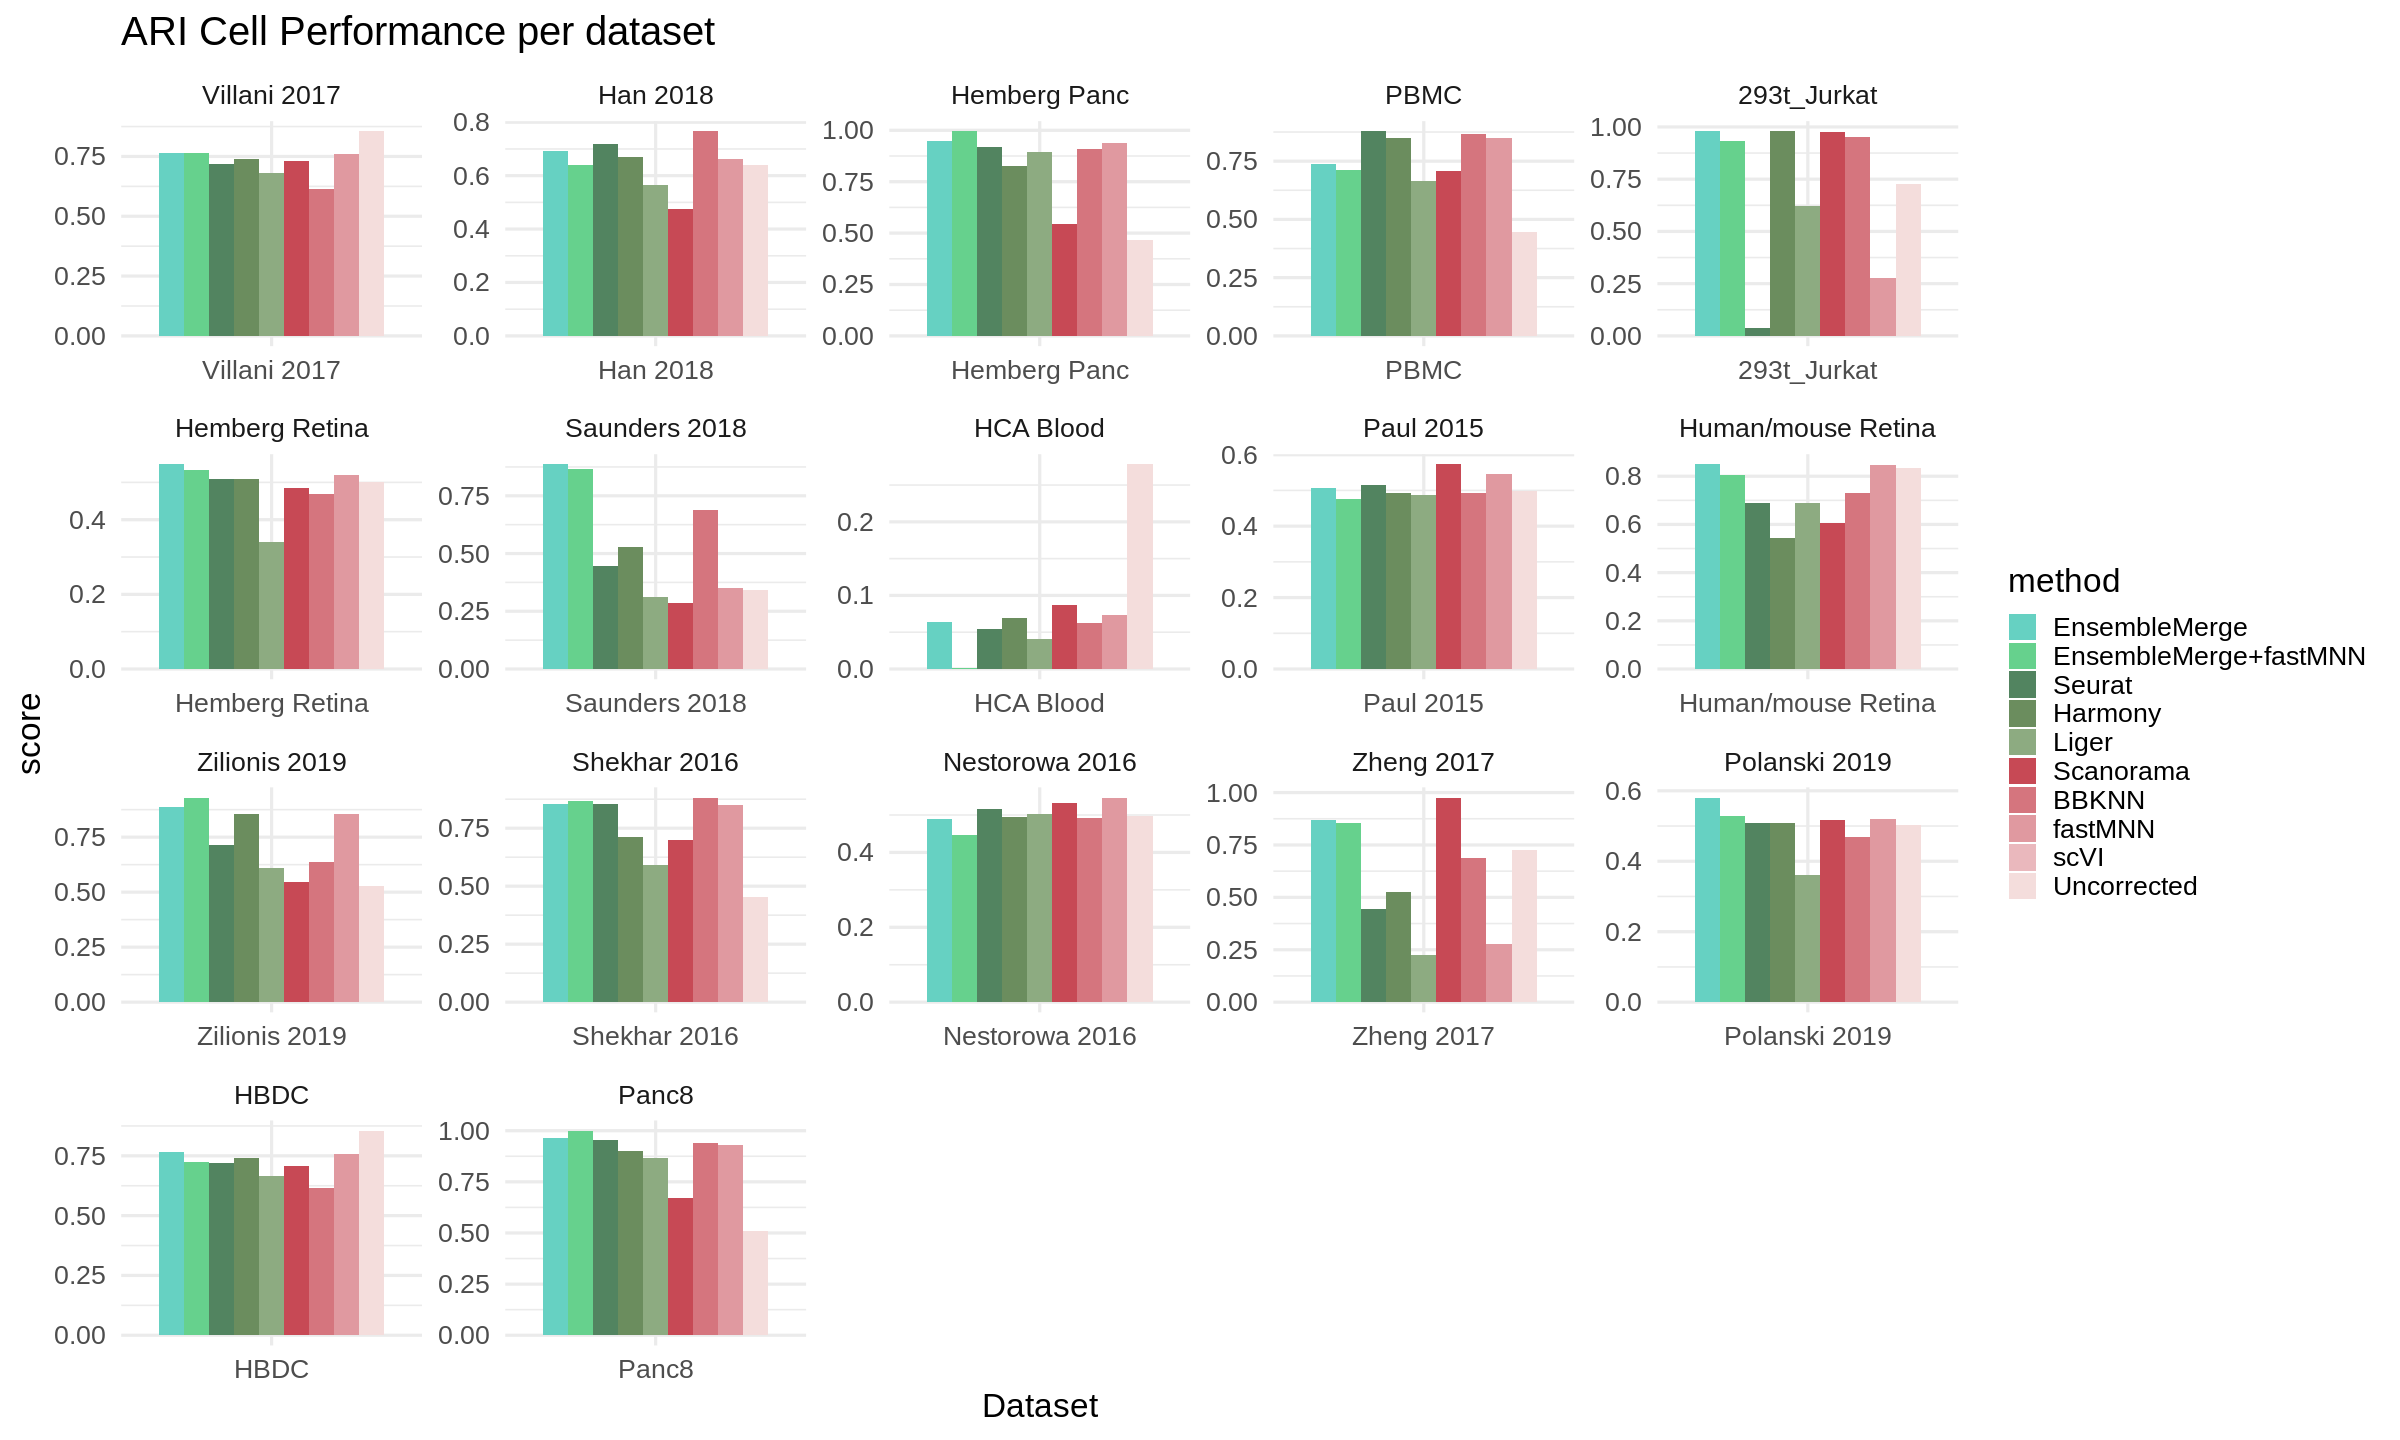

In [3]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "ARI_Cell"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "ARI Cell Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplementary Figure 10B

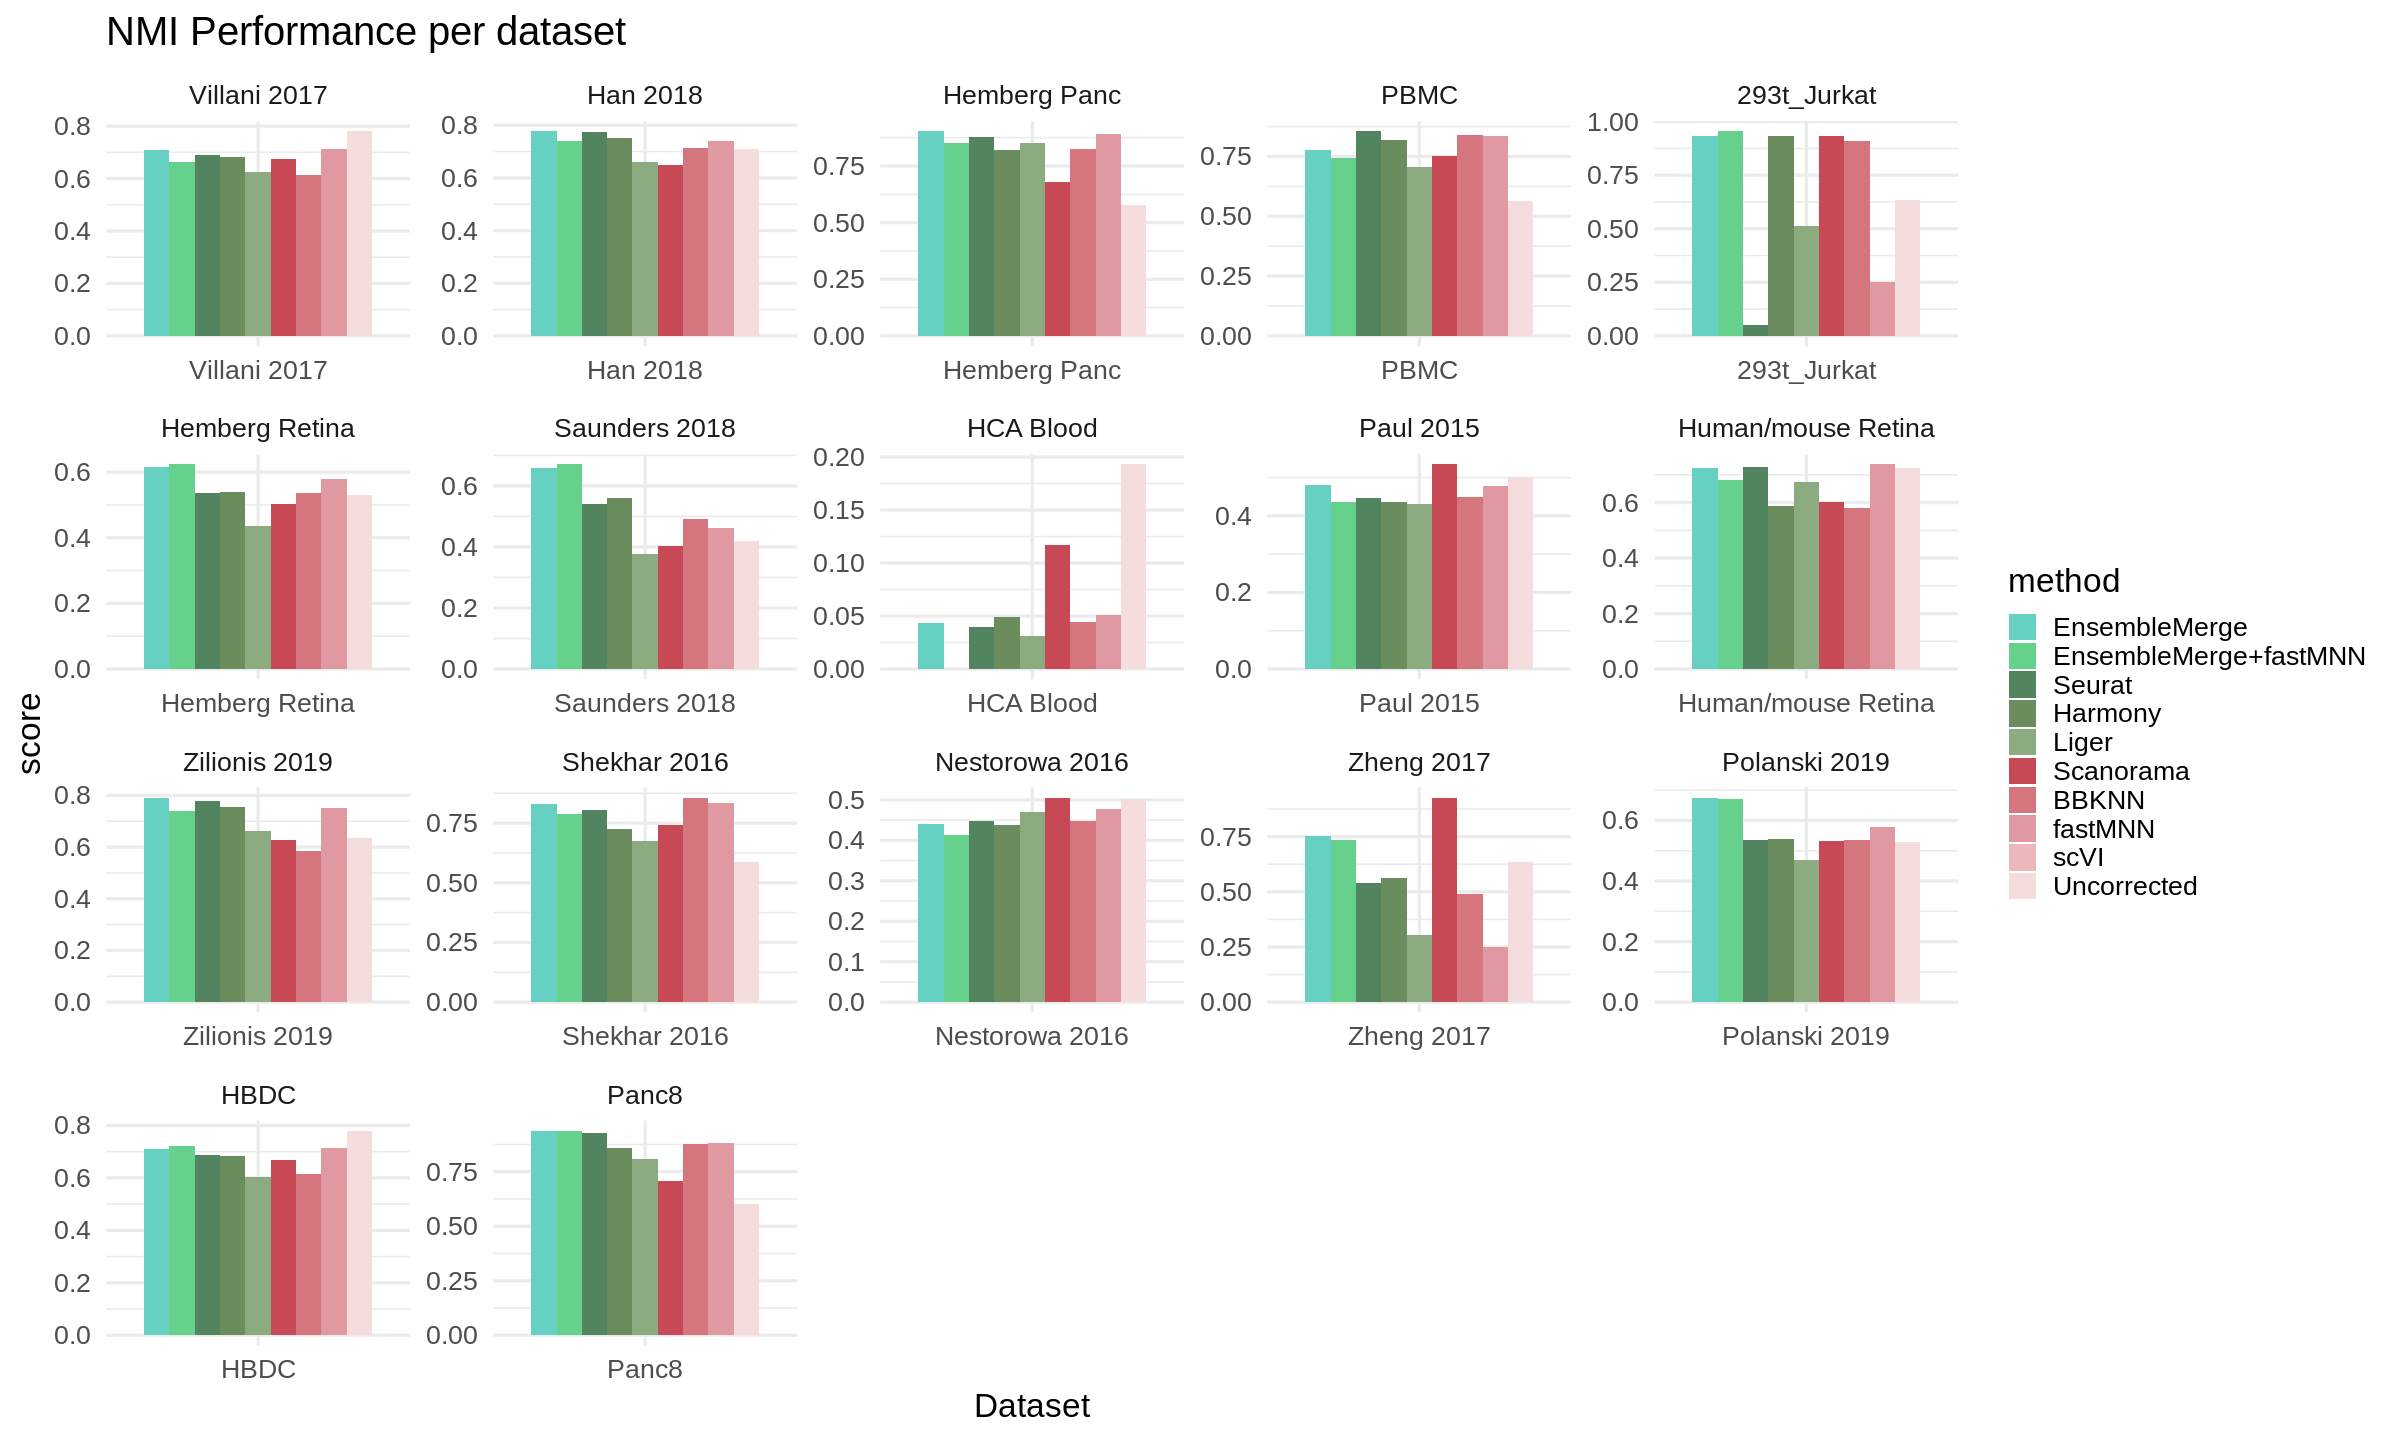

In [4]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "NMI"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "NMI Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplementary Figure 10C

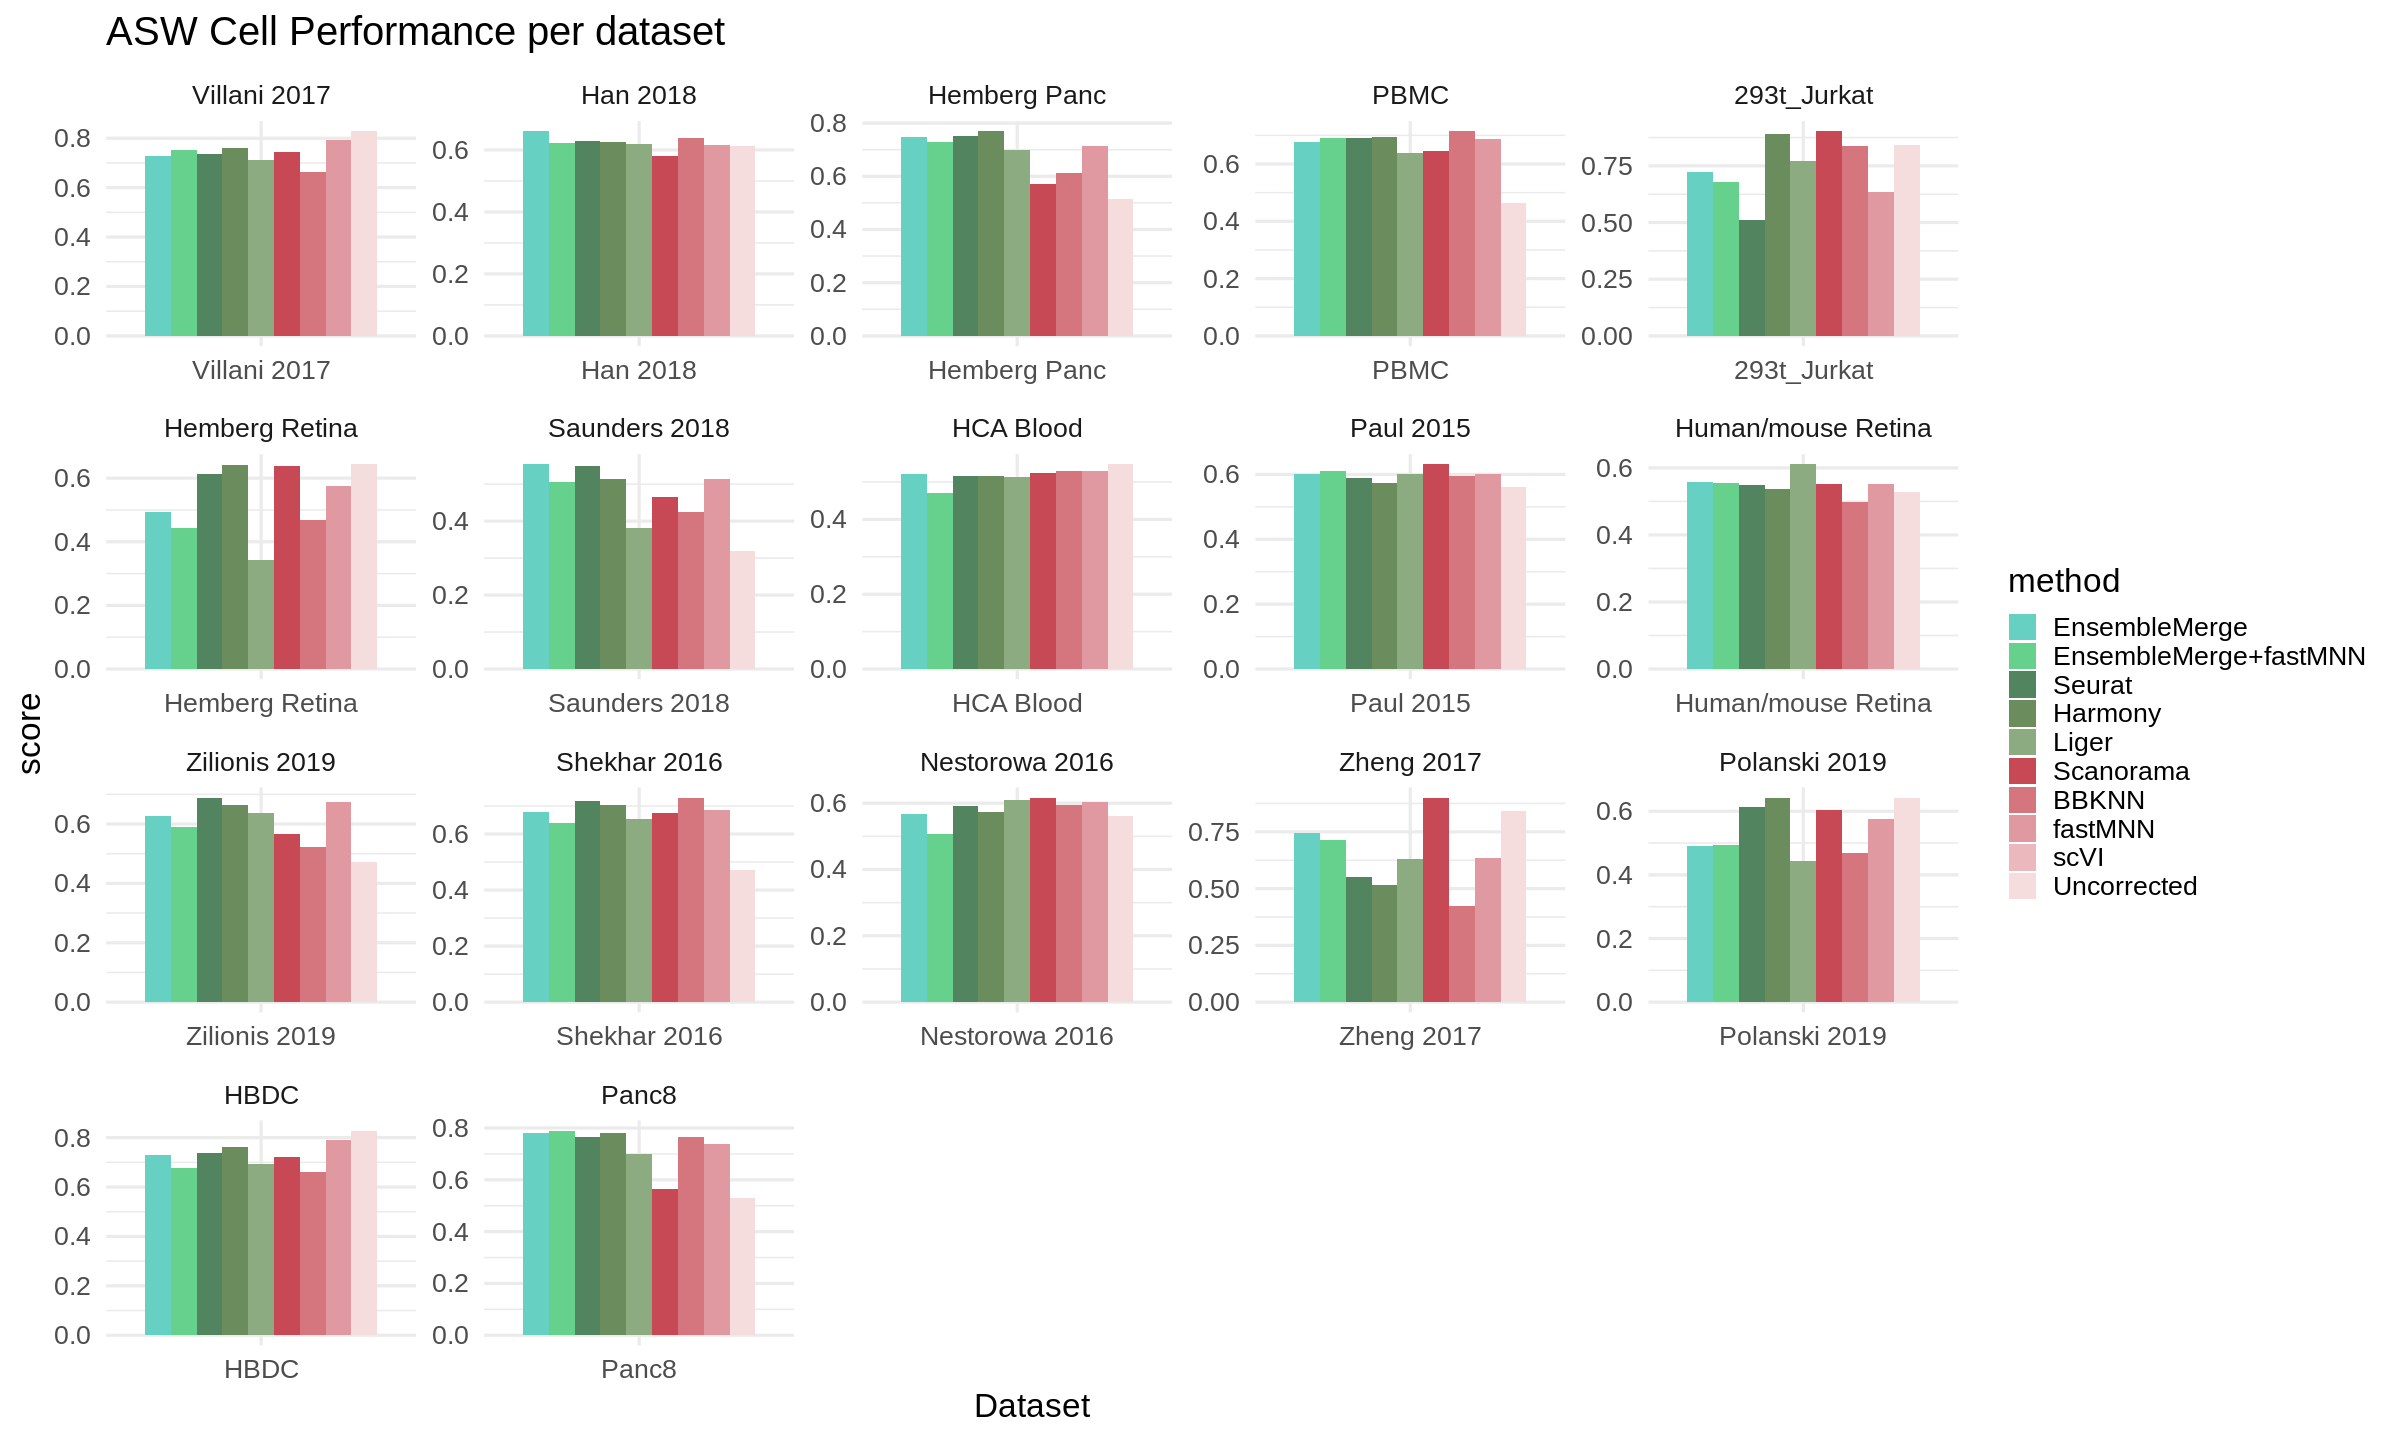

In [5]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "ASW_Cell"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "ASW Cell Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplementary Figure 10D

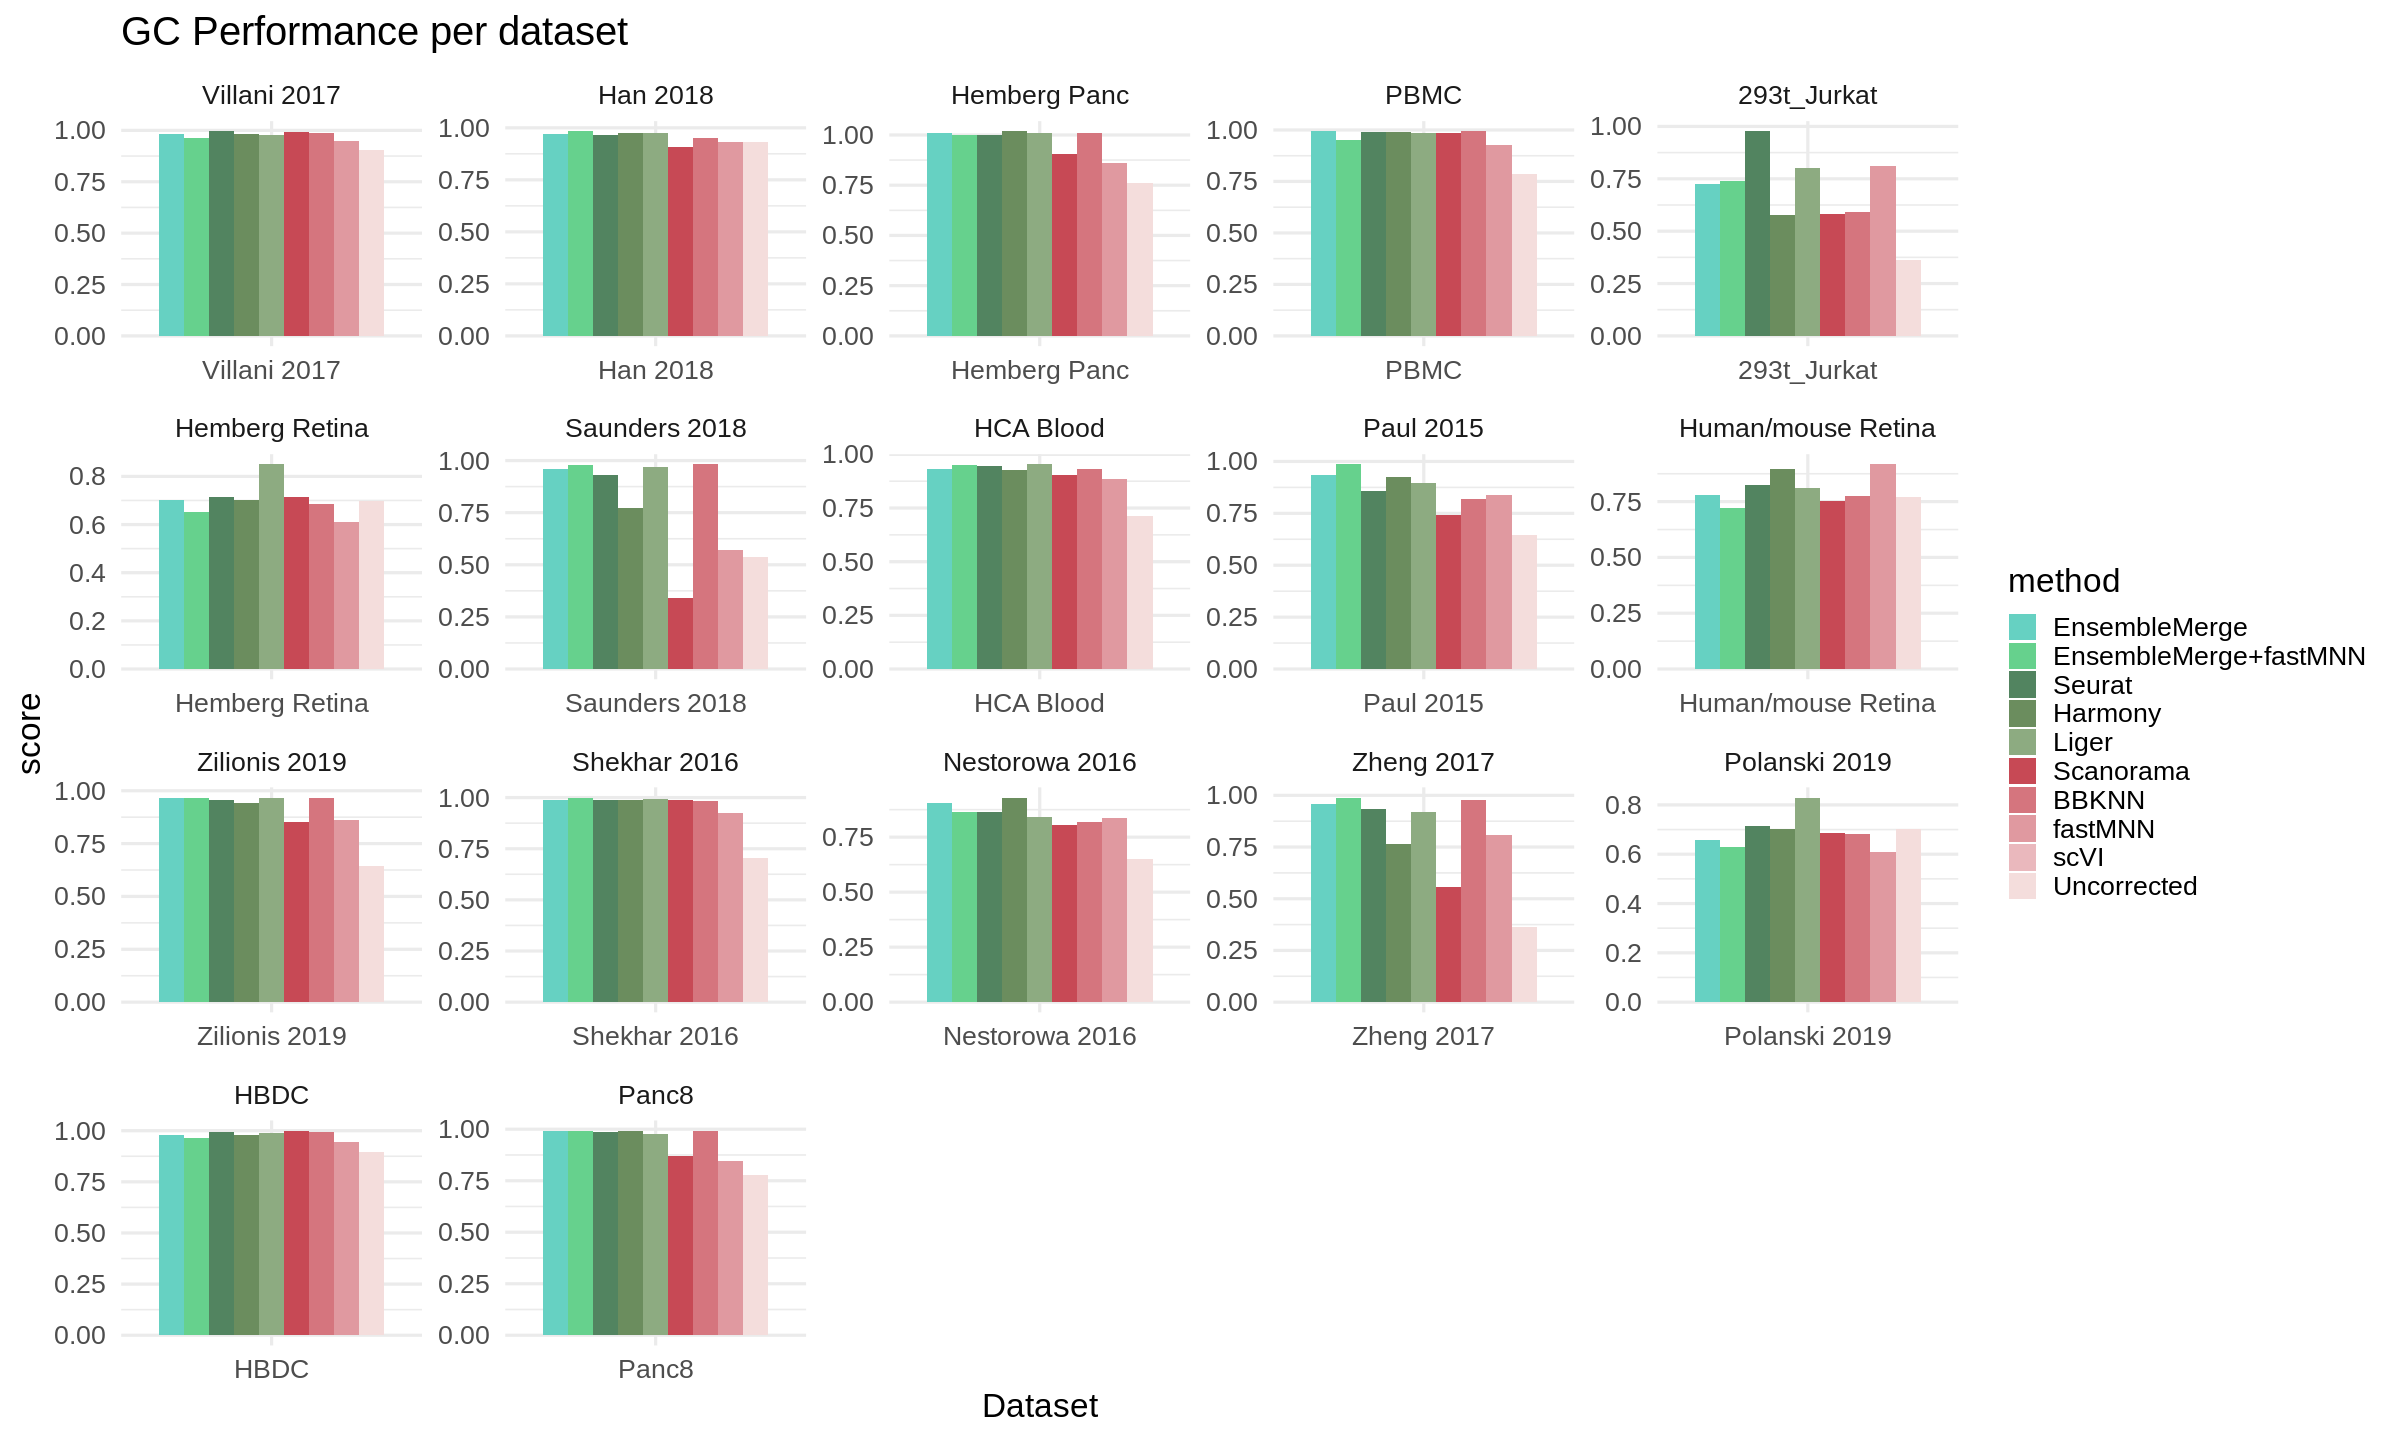

In [6]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "GC"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "GC Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplementary Figure 10E

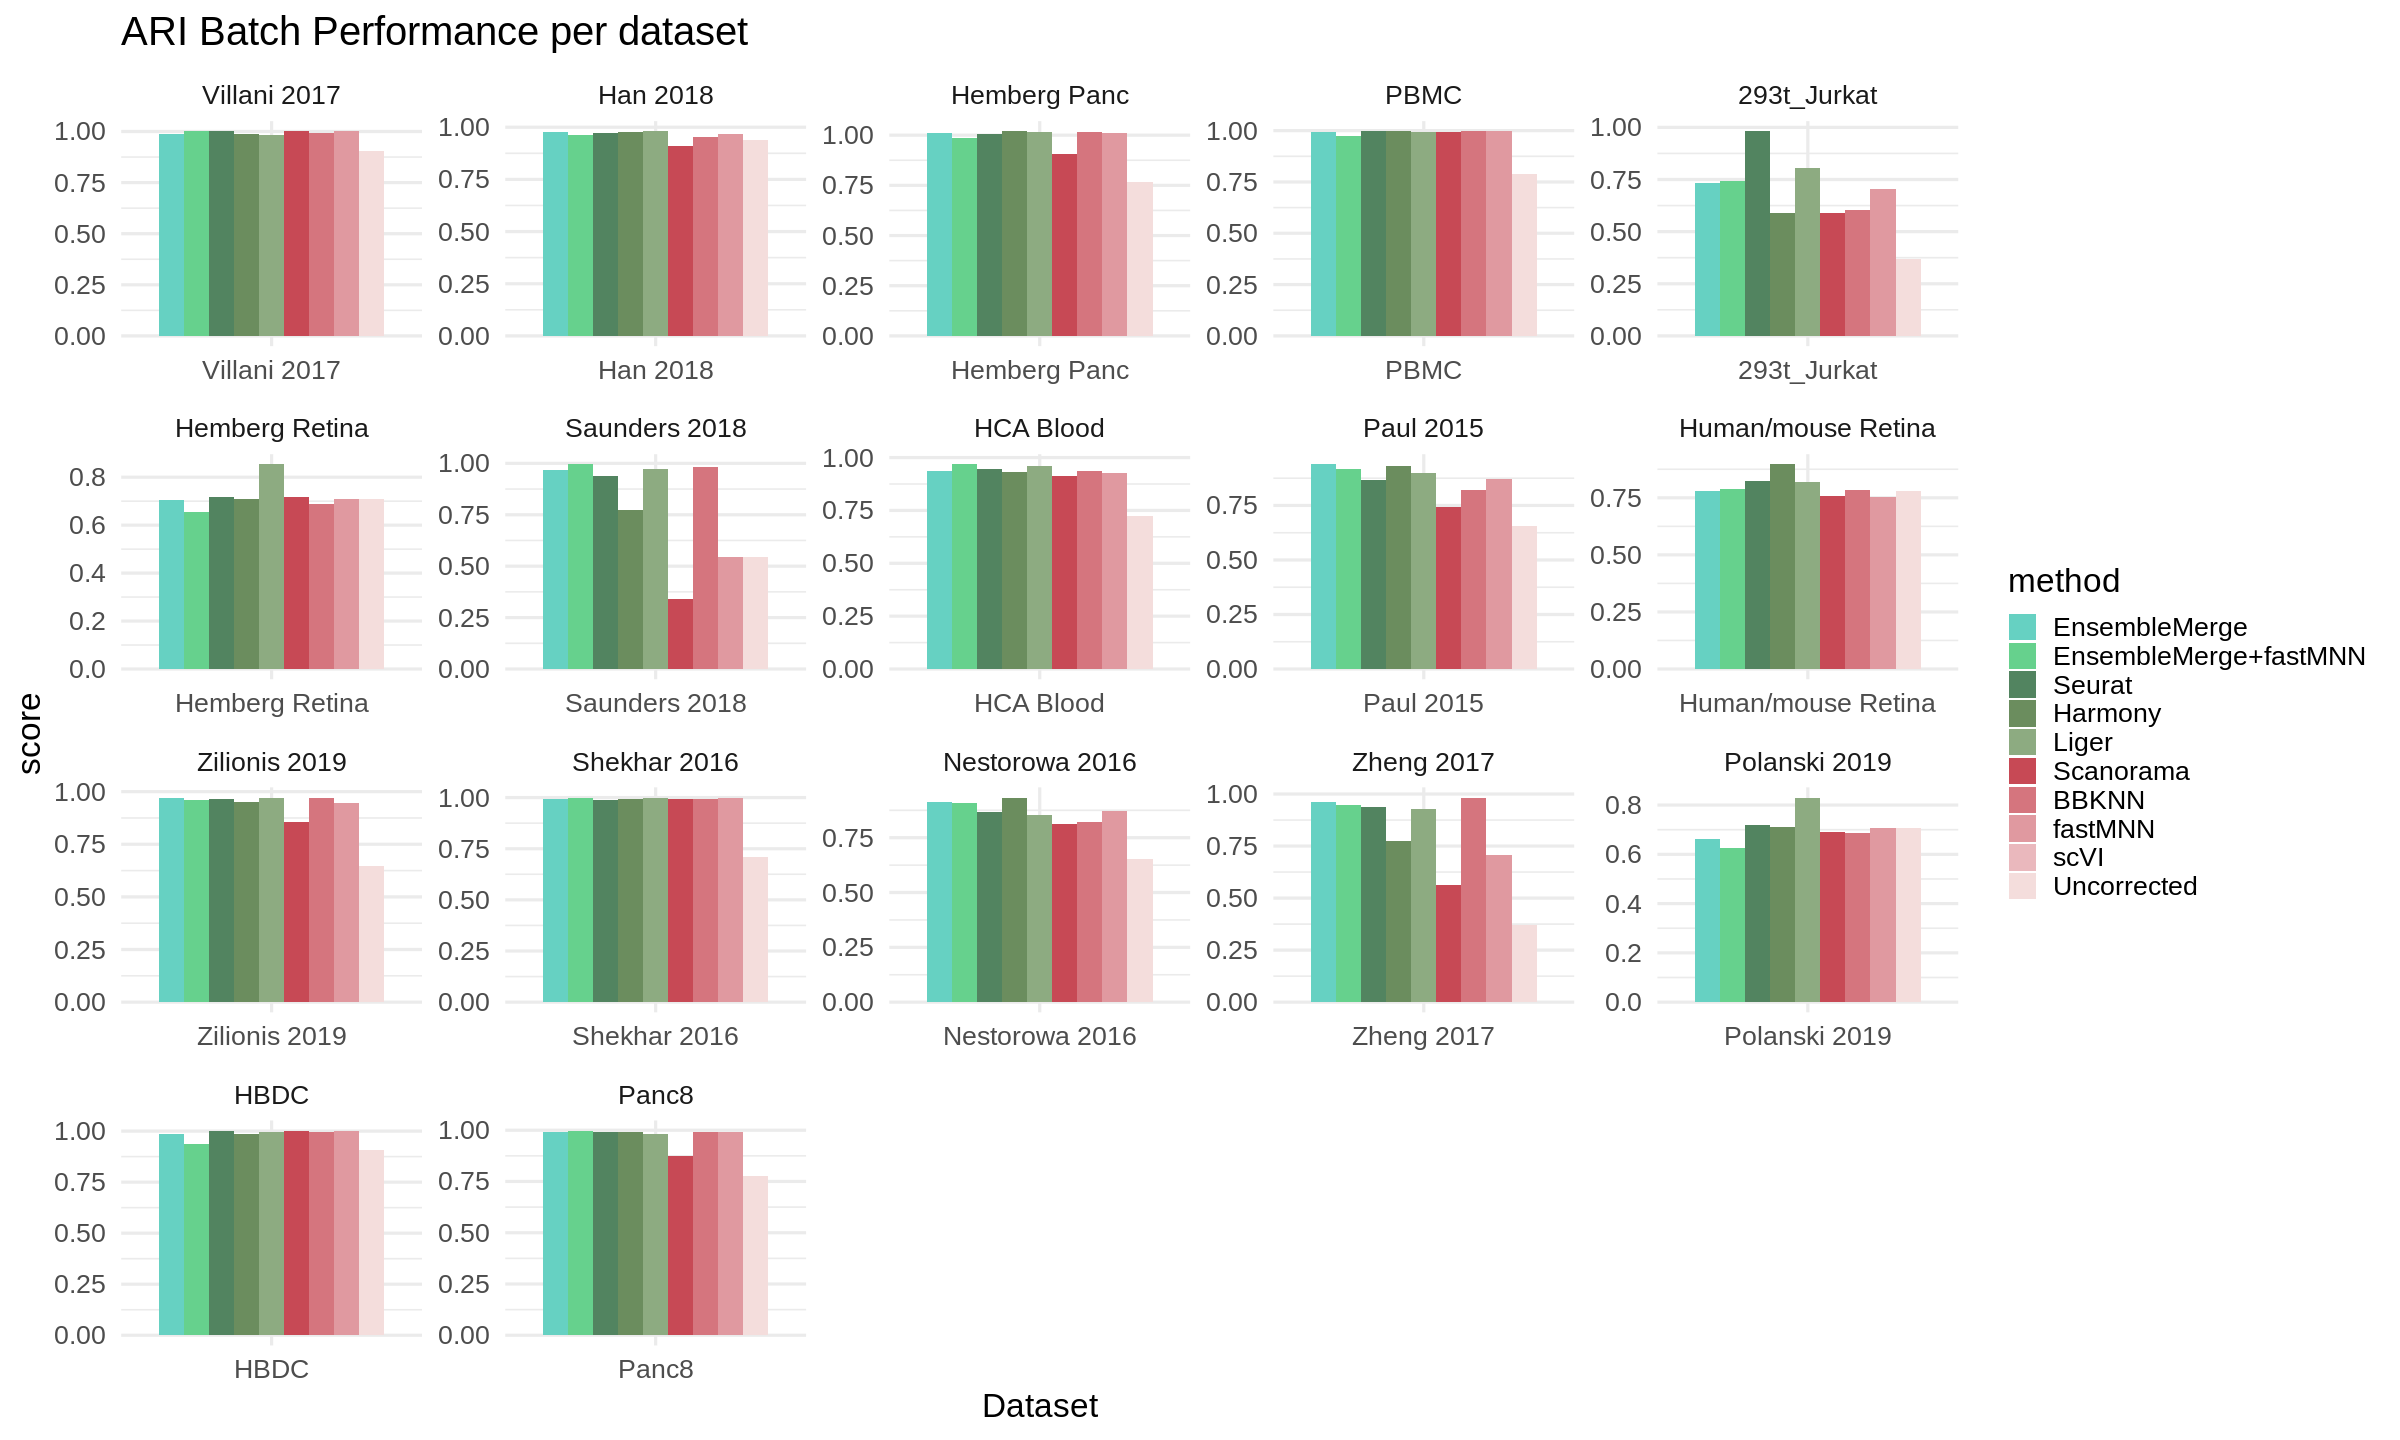

In [7]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "ARI_Batch"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "ARI Batch Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplementary Figure 10F

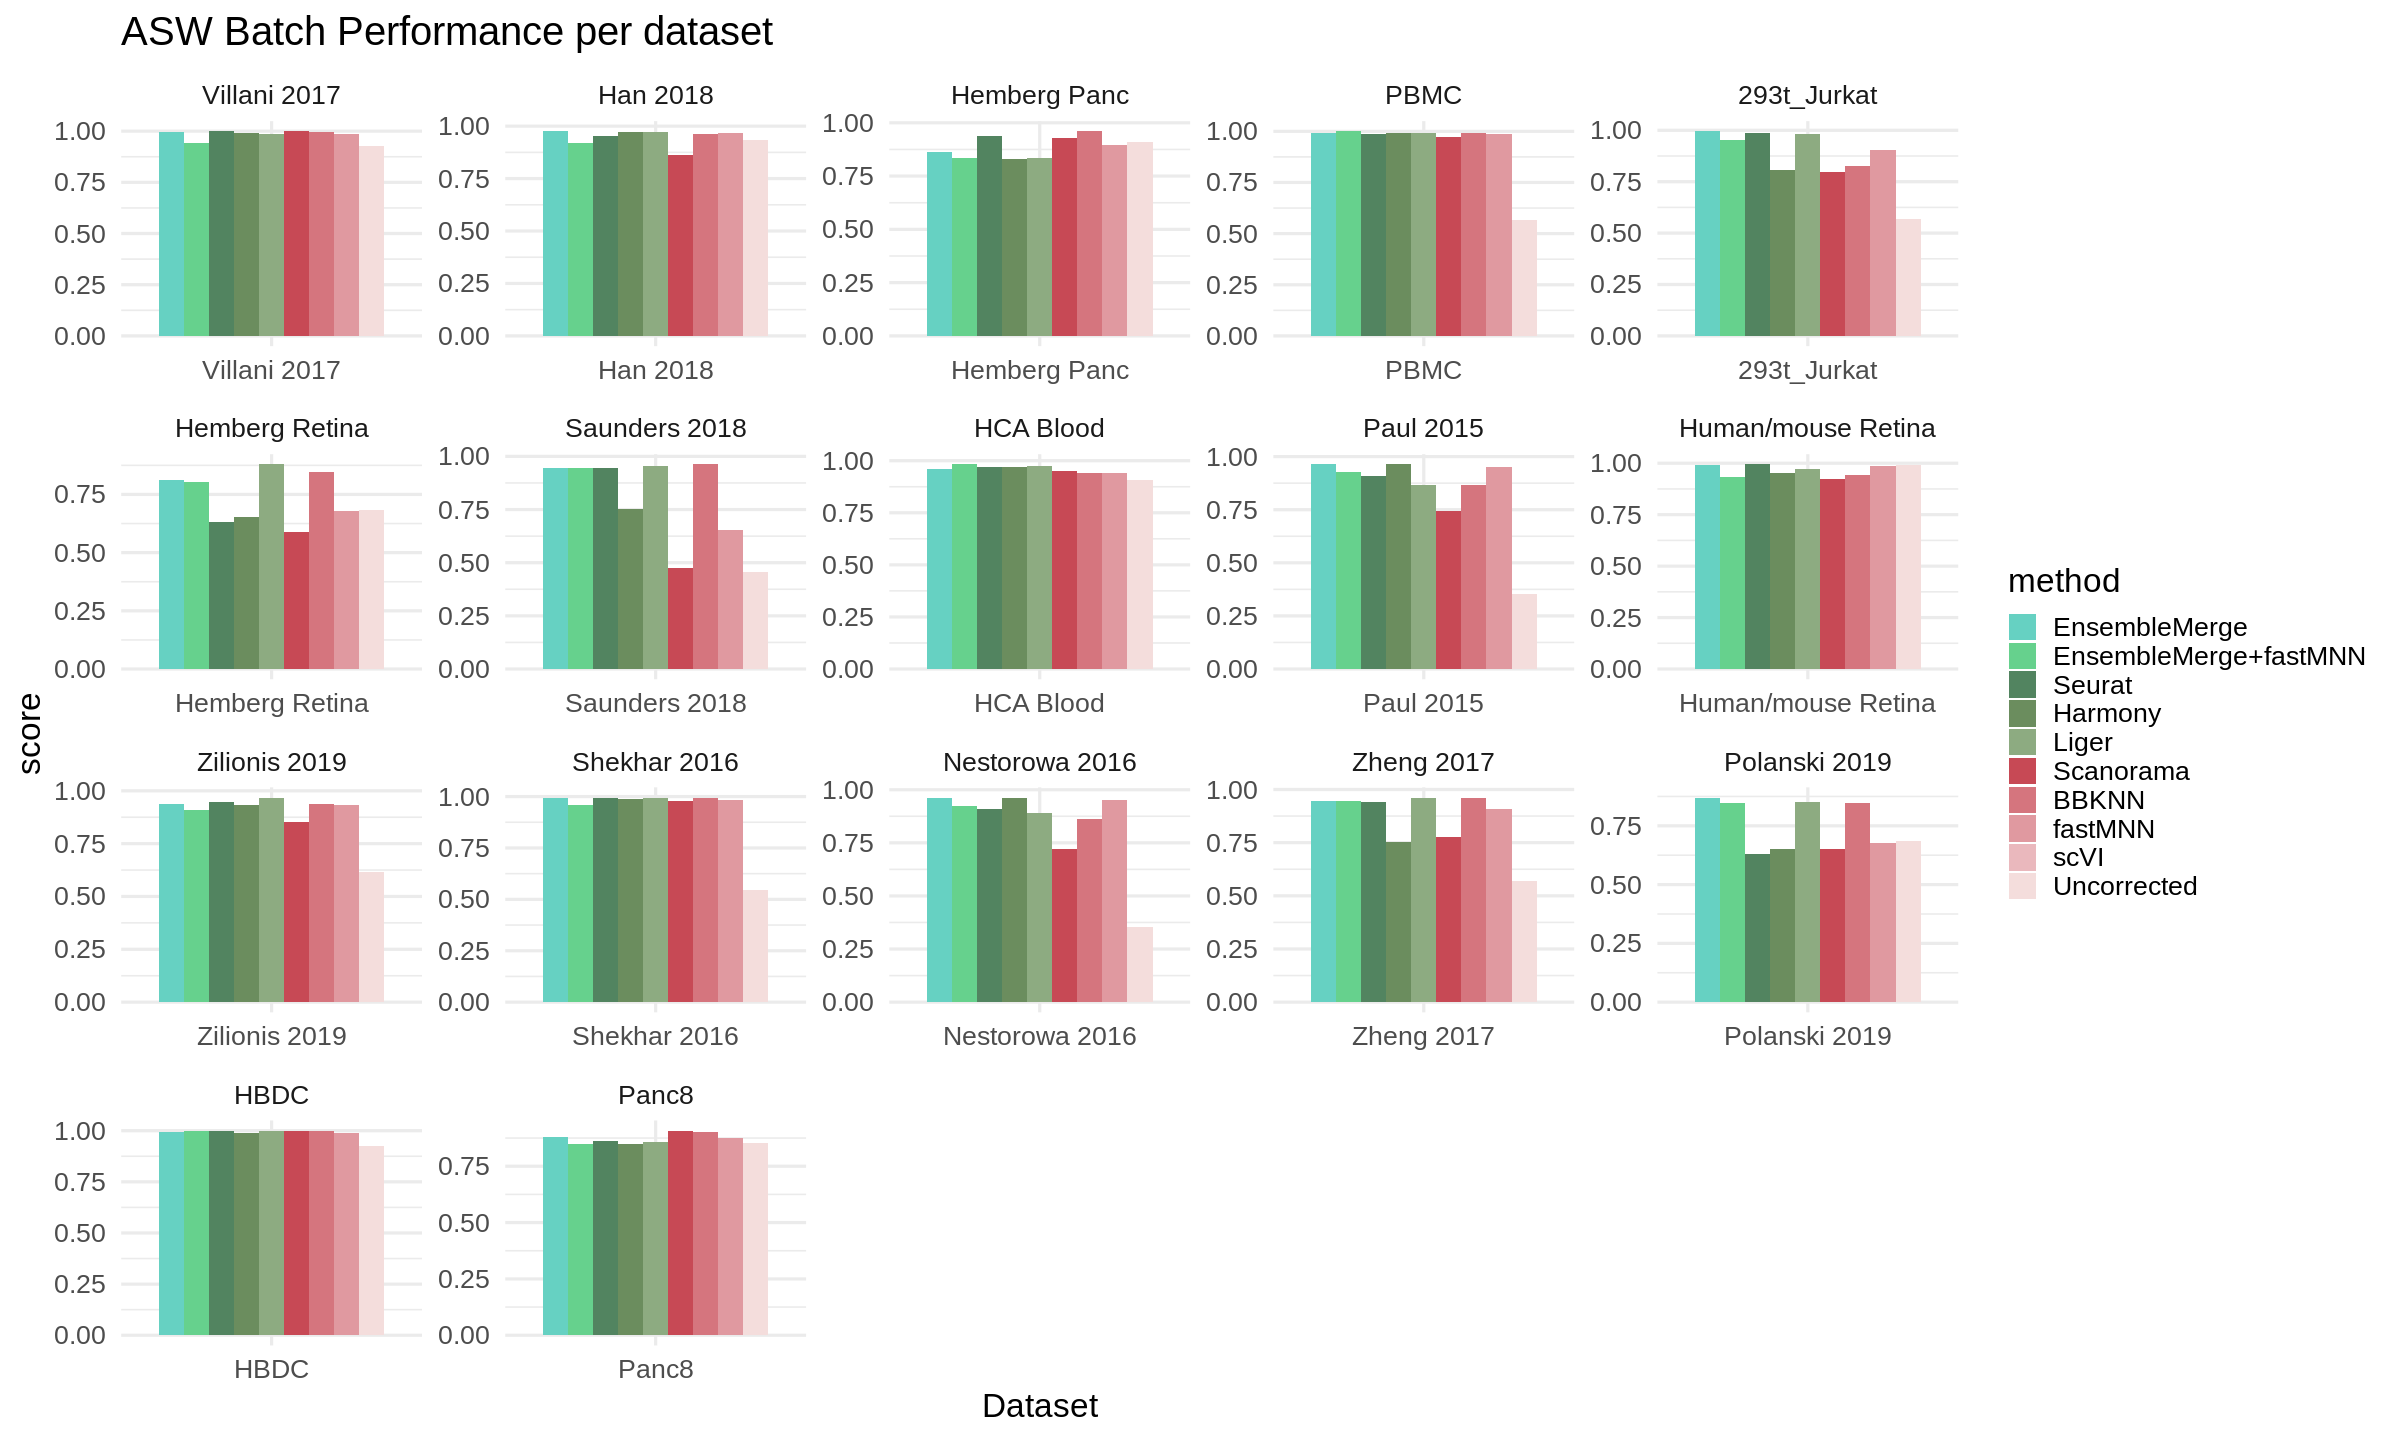

In [8]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "ASW_Batch"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "ASW Batch Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

##Supplementary Figure 10G

In [9]:
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/fig1.csv")
dat = read.table(file = "skiex003/datasets/EnsembleMerge/fig1.csv", header = T, sep = ",")
nData = dat$Datasets %>% unique() %>% length()
nMethod = dat$method %>% unique() %>% length()
range0_1 <- function(x){x/(nData*nMethod)}
Metric_Colors = c("ARI_Cell" = "#C93327", "NMI" = "#F4CDB3", "ASW_Cell" = "#F8766D", "GC" = "#857622", "ARI_Batch" = "#8A9DA4",  "ASW_Batch" = "#75A08B")
dat$method = factor(dat$method, levels = c("EnsembleMerge", "Seurat", "Harmony", "Scanorama", "BBKNN", "Liger", "Uncorrected"))
dat$score_method = factor(dat$score_method, levels = c("NMI", "ARI_Cell", "ASW_Cell", "GC",  "ARI_Batch", "ASW_Batch"))
dat %<>%  group_by(score_method, Datasets) %>% mutate(Rank = rank(score)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(Rank_Sum = sum(Rank)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(avg_rank = mean(Rank)) %>% ungroup() %>% mutate(scaled_rank_sum = range0_1(Rank_Sum))
dat %<>% filter(method == "EnsembleMerge")
dat$Method = "Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge"

system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/Methods_EnsembleMerge.csv")
full_methods = read.table(file = "skiex003/datasets/EnsembleMerge/Methods_EnsembleMerge.csv", header = T, sep = ",", row.names = 1)
nData = full_methods$Datasets %>% unique() %>% length()
nMethod = full_methods$method %>% unique() %>% length()
range0_1 <- function(x){x/(nData*nMethod)}
Metric_Colors = c("ARI_Cell" = "#C93327", "NMI" = "#F4CDB3", "ASW_Cell" = "#F8766D", "GC" = "#857622", "ARI_Batch" = "#8A9DA4",  "ASW_Batch" = "#75A08B")
full_methods$method = factor(full_methods$method, levels = c("EnsembleMerge", "Seurat", "Harmony", "Scanorama", "BBKNN", "Liger", "Uncorrected"))
full_methods$score_method = factor(full_methods$score_method, levels = c("NMI", "ARI_Cell", "ASW_Cell", "GC",  "ARI_Batch", "ASW_Batch"))
full_methods %<>%  group_by(score_method, Datasets) %>% mutate(Rank = rank(score)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(Rank_Sum = sum(Rank)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(avg_rank = mean(Rank)) %>% ungroup() %>% mutate(scaled_rank_sum = range0_1(Rank_Sum))
full_methods %<>% filter(method == "EnsembleMerge")
full_methods$Method = "Seurat-Harmony-Liger-Scanorama-BBKNN-FastMNN EnsembleMerge"

dat = rbind(dat, full_methods)
dat = dat[which(dat$Dataset != "Chen 2020"), ]
dat$Method = factor(dat$Method, levels = c("Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge", "Seurat-Harmony-Liger-Scanorama-BBKNN-FastMNN EnsembleMerge")) 
dat %>% head(n = 20)

score,score_method,method,Dataset,Datasets,Rank,Rank_Sum,avg_rank,scaled_rank_sum,Method
<dbl>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9738716,ARI_Batch,EnsembleMerge,Villani 2017,Dataset_1,2.0,82.5,4.342105,0.6547619,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.9870000,ARI_Batch,EnsembleMerge,Villani 2017,Dataset_1,4.5,82.5,4.342105,0.6547619,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.7650000,ARI_Cell,EnsembleMerge,Villani 2017,Dataset_1,6.0,101.5,5.638889,0.8055556,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.9960000,ASW_Batch,EnsembleMerge,Villani 2017,Dataset_1,4.0,96.5,5.361111,0.7658730,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.7300000,ASW_Cell,EnsembleMerge,Villani 2017,Dataset_1,3.0,79.5,4.416667,0.6309524,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.9808362,GC,EnsembleMerge,Villani 2017,Dataset_1,4.0,85.0,4.722222,0.6746032,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.7100000,NMI,EnsembleMerge,Villani 2017,Dataset_1,6.0,102.5,5.694444,0.8134921,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.9380000,ARI_Batch,EnsembleMerge,Paul 2015,Dataset_10,7.0,82.5,4.342105,0.6547619,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge
0.5055402,ARI_Cell,EnsembleMerge,Paul 2015,Dataset_10,5.0,101.5,5.638889,0.8055556,Seurat-Harmony-Liger-Scanorama-BBKNN EnsembleMerge


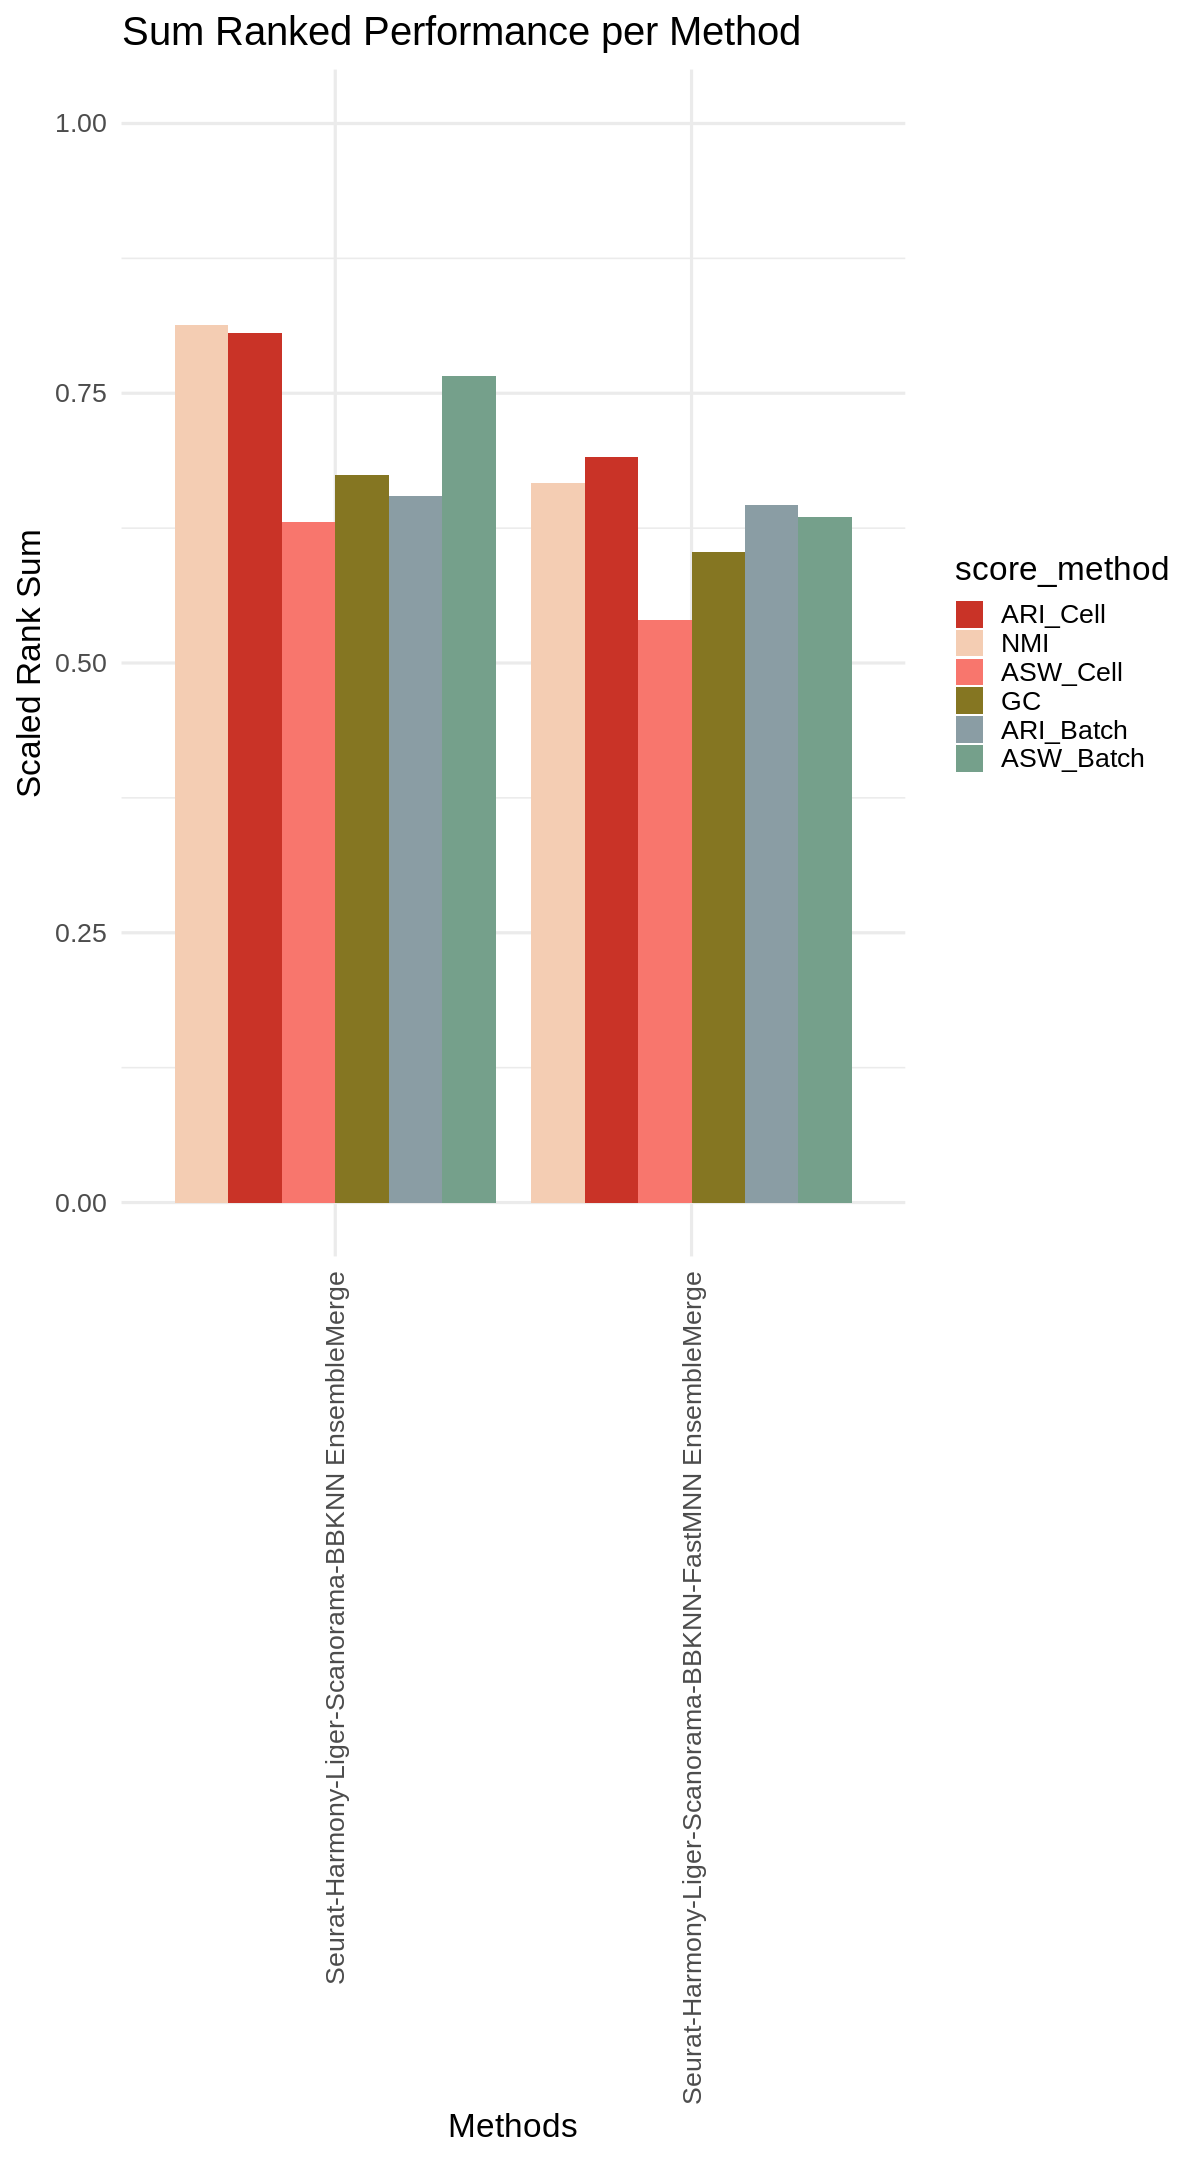

In [10]:
options(repr.plot.width = 10, repr.plot.height = 18)
p <- ggplot(dat, aes(x=Method, y=scaled_rank_sum, fill = score_method)) + 
  geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "Sum Ranked Performance per Method")) + scale_fill_manual(values = Metric_Colors[1:6]) + ylab("Scaled Rank Sum") + xlab("Methods") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + ylim(0,1)
p

In [11]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1   stringr_1.4.0   purrr_0.3.4     readr_2.1.1    
 [5] tidyr_1.1.4     tibble_3.1.6    tidyverse_1.3.1 dplyr_1.0.7    
 [9] ggplot2_3.3.5   magrittr_2.0.1 

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-6     tidyselect_1.1.1 repr_1.1.4  